In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="root",
  port='8889',
  database = "TraitsQTLs_genetics"
)


In [2]:
mycursor= mydb.cursor()

In [3]:
mycursor.execute("show tables")

In [4]:
for x in mycursor:
    print(x)

('Datos_Generales',)
('Mediciones',)


In [5]:
sql= 'select Valor from mediciones where tipo = "Frente"'
#informacion de la pigmentacion de la frente 

In [6]:
mycursor.execute(sql)

In [7]:
pigmentacion_frente= mycursor.fetchall()

In [8]:
pigmentacion_frente

[(39.72,),
 (45.42,),
 (39.2,),
 (47.59,),
 (49.13,),
 (54.1,),
 (39.65,),
 (44.5,),
 (46.28,),
 (41.31,),
 (49.8,),
 (40.54,),
 (59.38,),
 (47.5,),
 (40.7,),
 (45.59,),
 (38.69,),
 (42.88,),
 (47.06,),
 (44.17,),
 (41.46,),
 (49.97,),
 (54.95,),
 (49.78,),
 (43.52,),
 (41.0,),
 (55.48,),
 (50.63,),
 (53.9,),
 (52.89,),
 (42.32,),
 (41.69,),
 (45.34,),
 (41.54,),
 (48.95,),
 (51.99,),
 (50.07,),
 (40.47,),
 (46.97,),
 (44.83,),
 (42.32,),
 (52.39,),
 (39.42,),
 (51.7,),
 (48.49,),
 (42.08,),
 (45.51,),
 (40.02,),
 (42.16,),
 (49.5,),
 (44.67,),
 (41.52,),
 (51.7,),
 (54.84,),
 (49.97,),
 (43.76,),
 (42.48,),
 (56.23,),
 (50.35,),
 (56.01,),
 (53.39,),
 (42.4,),
 (41.46,),
 (42.88,),
 (41.0,),
 (49.41,),
 (52.69,),
 (51.9,),
 (43.44,),
 (47.06,),
 (45.0,),
 (42.01,),
 (52.39,),
 (37.41,),
 (52.29,),
 (48.13,),
 (41.38,),
 (43.04,),
 (40.92,),
 (41.46,),
 (48.58,),
 (41.0,),
 (41.62,),
 (50.25,),
 (53.9,),
 (50.54,),
 (42.64,),
 (42.88,),
 (57.33,),
 (50.54,),
 (56.23,),
 (52.99,),
 (43.

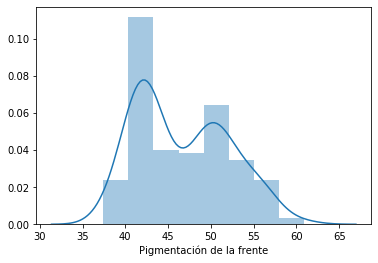

In [9]:
sns.distplot(pigmentacion_frente, axlabel="Pigmentación de la frente")

In [10]:
sql= 'select Valor from mediciones where tipo = "Brazo"'

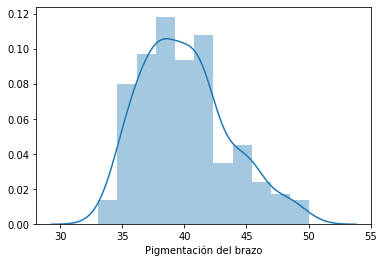

In [11]:
mycursor.execute(sql)
pigmentacion_brazo= mycursor.fetchall()
sns.distplot(pigmentacion_brazo, axlabel="Pigmentación del brazo")

In [12]:
sql= 'select Valor from mediciones where tipo = "Altura"'

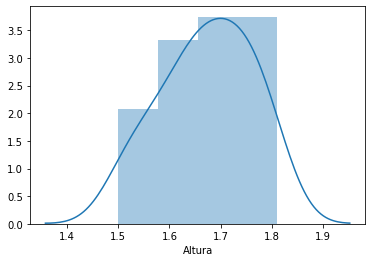

In [13]:
mycursor.execute(sql)
altura= mycursor.fetchall()
sns.distplot(altura, axlabel="Altura")

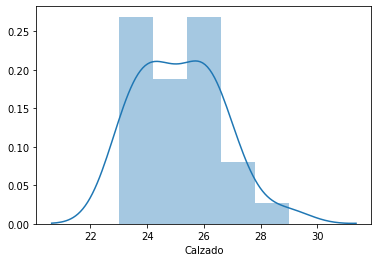

In [14]:
sql= 'select Valor from mediciones where tipo = "Calzado"'
mycursor.execute(sql)
calzado= mycursor.fetchall()
sns.distplot(calzado, axlabel="Calzado")

In [15]:
sql= ("select dg.nombre, m.valor from datos_generales dg, mediciones m where dg.persona_id = m.persona_id AND tipo = 'Brazo'")

In [16]:
mycursor.execute(sql)


In [17]:
pigmentacion= mycursor.fetchall()
pigmentacion_dict={}

In [153]:
c= 0
a= 0
for i in range(5,len(pigmentacion),6):
    for j in range(a,len(pigmentacion)):
        c=c+1
        if c != 7:
            pigmentacion_dict.setdefault(pigmentacion[i][0], []).append(pigmentacion[j][1])
        else:
            a= a+6
            c=0
            break
#con esta parte del codigo pasamos el resultado del select a un diccionario con sus correspondientes mediciones

In [154]:
pigmentacion_dict

{'Mónica Padilla': [33.06, 35.75, 40.09, 45.25, 42.16, 39.79],
 'Margareta Boege': [37.06, 41.62, 37.62, 43.6, 41.85, 36.43],
 'Ana Altamirano': [43.36, 38.55, 38.69, 39.79, 39.13, 37.97],
 'Carlos Aguilar': [45.59, 36.29, 34.81, 42.72, 37.55, 46.45],
 'Erick Santiago': [36.85, 37.27, 41.46, 44.83, 40.77, 41.93],
 'Sophia Orozco': [37.13, 34.09, 35.68, 40.54, 46.02, 41.54],
 'Brenda Pardo': [40.24, 37.41, 41.77, 36.02, 40.6, 41.54],
 'Arturo García': [39.35, 44.67, 39.2, 38.55, 39.79, 39.2],
 'Isaac Garnica': [38.98, 45.51, 35.61, 35.34, 43.2, 37.62],
 'Ariel Pulido': [47.86, 37.76, 37.2, 41.85, 47.59, 39.87],
 'Arlet Lara': [40.17, 37.34, 35.08, 35.75, 40.17, 45.09],
 'Luis Felipe Cedeño': [42.08, 40.32, 36.43, 41.93, 37.76, 40.85],
 'Valeria Añorve': [41.08, 37.83, 43.84, 39.2, 38.84, 41.38],
 'Tania Sepúlveda': [38.77, 38.26, 45.17, 35.61, 35.28, 44.17],
 'Víctor Flores': [36.64, 48.86, 38.04, 38.55, 41.77, 48.31],
 'Luis Fernández': [39.35, 41.15, 36.92, 34.94, 36.02, 39.42],
 'Nat

In [155]:
pig_dataframe= pd.DataFrame(pigmentacion_dict)
pig_dataframe

,Mónica Padilla,Margareta Boege,Ana Altamirano,Carlos Aguilar,Erick Santiago,Sophia Orozco,Brenda Pardo,Arturo García,Isaac Garnica,Ariel Pulido,...,Zoe Franco,César Aspiros,Lucía Morales,Sebastián García,Emilio Calderón,Luisa Sarai Sevila Nicolas,Jair Garcia,Jorge Luis Cuamatzi,Iván Sedeño,Goche Ortega
0,33.06,37.06,43.36,45.59,36.85,37.13,40.24,39.35,38.98,47.86,...,40.24,36.71,38.26,35.08,41.93,35.668,42.072,38.854,35.842,37.938
1,35.75,41.62,38.55,36.29,37.27,34.09,37.41,44.67,45.51,37.76,...,45.51,41.08,41.38,43.76,46.02,40.092,37.302,38.650,35.130,41.834
2,40.09,37.62,38.69,34.81,41.46,35.68,41.77,39.20,35.61,37.20,...,41.23,41.08,39.13,36.92,40.17,45.392,41.426,40.744,43.474,47.084
3,45.25,43.60,39.79,42.72,44.83,40.54,36.02,38.55,35.34,41.85,...,40.47,34.55,38.33,50.07,39.50,41.740,41.250,39.000,37.158,40.156
4,42.16,41.85,39.13,37.55,40.77,46.02,40.60,39.79,43.20,47.59,...,37.27,44.25,44.83,37.41,35.95,40.304,36.620,38.404,48.382,40.734
5,39.79,36.43,37.97,46.45,41.93,41.54,41.54,39.20,37.62,39.87,...,42.56,38.55,36.09,38.84,34.41,37.074,44.026,45.338,37.620,36.936


[Text(0, 0.5, 'Valor de pigmentacion (valores de brazo)'),
 Text(0.5, 0, 'Nombre de la persona')]

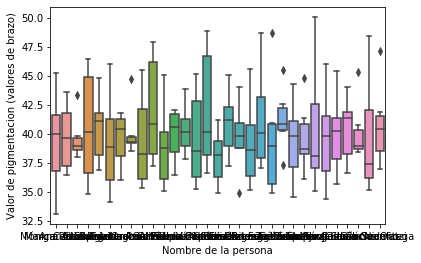

In [160]:
sns.boxplot(data= pig_dataframe).set(xlabel='Nombre de la persona', ylabel='Valor de pigmentacion (valores de brazo)')

In [161]:
sql= ("select dg.nombre, m.valor from datos_generales dg, mediciones m where dg.persona_id = m.persona_id AND tipo = 'Frente'")

In [163]:
mycursor.execute(sql)
frente= mycursor.fetchall()
frente_dict={}

In [165]:
c= 0
a= 0
for i in range(5,len(frente),6):
    for j in range(a,len(frente)):
        c=c+1
        if c != 7:
            frente_dict.setdefault(frente[i][0], []).append(frente[j][1])
        else:
            a= a+6
            c=0
            break

In [166]:
frente_dataframe= pd.DataFrame(frente_dict)
frente_dataframe

,Mónica Padilla,Margareta Boege,Ana Altamirano,Carlos Aguilar,Erick Santiago,Sophia Orozco,Brenda Pardo,Arturo García,Isaac Garnica,Ariel Pulido,...,Zoe Franco,César Aspiros,Lucía Morales,Sebastián García,Emilio Calderón,Luisa Sarai Sevila Nicolas,Jair Garcia,Jorge Luis Cuamatzi,Iván Sedeño,Goche Ortega
0,39.72,39.65,59.38,47.06,43.52,42.32,50.07,39.42,42.16,49.97,...,42.64,41.46,41.23,38.77,56.010,43.928,46.922,48.366,42.368,42.090
1,45.42,44.50,47.50,44.17,41.00,41.69,40.47,51.70,49.50,43.76,...,50.54,42.56,44.34,50.73,52.390,41.108,43.962,41.416,40.982,56.344
2,39.20,46.28,40.70,41.46,55.48,45.34,46.97,48.49,44.67,42.48,...,50.35,50.35,38.12,54.21,57.110,49.386,42.296,44.596,50.656,51.180
3,47.59,41.31,45.59,49.97,50.63,41.54,44.83,42.08,41.52,56.23,...,49.69,38.33,41.93,51.21,52.190,50.770,50.980,39.640,54.320,55.962
4,49.13,49.80,38.69,54.95,53.90,48.95,42.32,45.51,51.70,50.35,...,43.44,55.58,48.49,43.76,42.960,50.832,38.820,42.118,50.426,52.990
5,54.10,40.54,42.88,49.78,52.89,51.99,52.39,40.02,54.84,56.01,...,48.13,49.13,40.92,42.16,41.036,42.056,55.976,48.460,43.424,42.832


[Text(0, 0.5, 'Valor de pigmentacion (valores de frente)'),
 Text(0.5, 0, 'Nombre de la persona')]

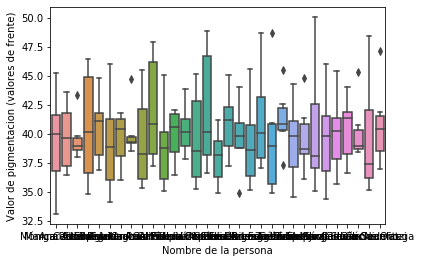

In [168]:
sns.boxplot(data= pig_dataframe).set(xlabel='Nombre de la persona', ylabel='Valor de pigmentacion (valores de frente)')

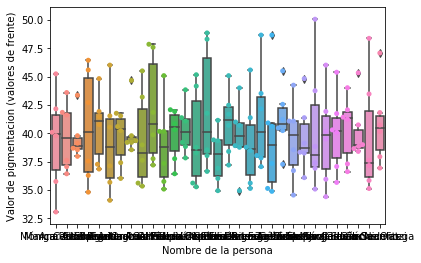

In [170]:
ax= sns.boxplot(data= pig_dataframe).set(xlabel='Nombre de la persona', ylabel='Valor de pigmentacion (valores de frente)')
ax= sns.swarmplot(data= pig_dataframe)
#con los puntos sobre las cajas, pero en realidad no importa mucho 